In [41]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(faces.images.shape)
print(faces.target_names)

(1288, 50, 37)
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


### fetch_lfw_people( )
  - min_faces_per_person=70
    - 최소 70개 이상의 이미지가 있는 인물들의 데이터만 포함
    - 충분한 데이터가 있는 인물만을 대상으로 학습이나 테스트가 가능하도록 하기 위함
  - resize:
    - 각 이미지의 크기를 조정하는 비율을 설정
    - resize=0.4는 원본 이미지 크기를 0.4배로 줄인다는 것을 의미
    - 너무 작게 설정하면 이미지의 세부 정보가 손실

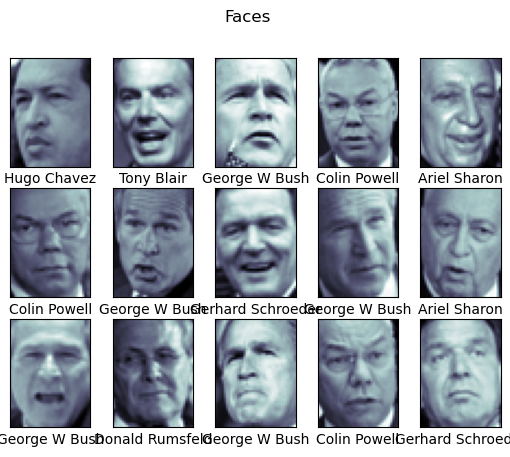

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.suptitle('Faces')
plt.show()

## for i, axi in enumerate(ax.flat):
- ax.flat는 ax 배열을 1차원으로 평평하게 만들어 준다.
- i는 현재 이미지의 인덱스이고, axi는 해당 이미지를 그릴 subplot
- cmap='bone'은 컬러맵을 'bone'으로 설정하여 이미지를 회색조로 표시
- axi.set 함수는 각 subplot의 축 설정을 정의

In [43]:
import numpy as np

X = faces.data
n_features = X.shape[1]
print(f'Data shape: {X.shape}, number of features: {n_features}')

y = faces.target
print(np.unique(y))

n_classes = faces.target_names.shape[0]
print(n_classes)

Data shape: (1288, 1850), number of features: 1850
[0 1 2 3 4 5 6]
7


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

In [45]:
from sklearn.decomposition import PCA
n_components = 150 # 1850 -> 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

n_samples, h, w = faces.images.shape
eigenfaces = pca.components_.reshape(n_components, h, w)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1e-3, 1e3, 5e3, 1e4, 5e4],
              'gamma': [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1e-1]}
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5
)
clf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 1000.0, 5000.0, 10000.0, 50000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

In [47]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.005}
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [48]:
from sklearn import metrics

y_fit = clf.predict(X_test_pca)

print(metrics.confusion_matrix(y_test, y_fit, labels=range(n_classes)))
print(metrics.classification_report(y_test, y_fit, target_names=faces.target_names))

[[ 14   2   0   3   0   0   0]
 [  1  55   0   3   0   0   0]
 [  0   0  20  10   0   0   0]
 [  0   2   1 130   0   0   0]
 [  0   0   2   5  20   0   0]
 [  0   2   0   4   0  10   2]
 [  0   1   0   6   0   0  29]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.74      0.82        19
     Colin Powell       0.89      0.93      0.91        59
  Donald Rumsfeld       0.87      0.67      0.75        30
    George W Bush       0.81      0.98      0.88       133
Gerhard Schroeder       1.00      0.74      0.85        27
      Hugo Chavez       1.00      0.56      0.71        18
       Tony Blair       0.94      0.81      0.87        36

         accuracy                           0.86       322
        macro avg       0.92      0.77      0.83       322
     weighted avg       0.88      0.86      0.86       322
